# 3. Publications Citations 

This Notebook shows how it's possible to extract basic indicators about Rome University programmatically, using the Dimensions API with Jupyter Notebooks. 


In [1]:
import dimcli
from dimcli.shortcuts import dslquery
import pandas as pd
from pandas.io.json import json_normalize
import plotly_express as px
from plotly.offline import init_notebook_mode # needed for exports 
init_notebook_mode(connected=True)

Dimensions data source are mined for organizations identifiers using GRID, the [Global Research Identifier Database](https://grid.ac/). So we can use GRID IDs to perform searches across all source in Dimensions. 

The GRID ID for Rome La Sapienza is [grid.7841.a](https://grid.ac/institutes/grid.7841.a). 


In [2]:
GRIDID = "grid.7841.a"

## Publications most cited in last 2 years

In [3]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+recent_citations+journal+type] sort by recent_citations""")
df = data.as_dataframe()
df.head(20)

Returned Publications: 20 (total = 120654)


doi    journal.id  \
0      10.1051/0004-6361/201525830  jour.1026093   
1    10.1016/s0140-6736(14)60460-8  jour.1077219   
2   10.1103/physrevlett.116.061102  jour.1018277   
3   10.1103/physrevlett.119.161101  jour.1018277   
4    10.1080/15548627.2015.1100356  jour.1036458   
5        10.1007/s00134-017-4683-6  jour.1313639   
6                 10.1038/nmat1368  jour.1031408   
7   10.1103/physrevlett.116.241103  jour.1018277   
8   10.1103/physrevlett.118.221101  jour.1018277   
9    10.1016/s1470-2045(11)70393-x  jour.1023279   
10  10.1016/j.physletb.2012.08.020  jour.1094748   
11  10.1016/j.physletb.2012.08.021  jour.1094748   
12  10.1103/physrevlett.119.141101  jour.1018277   
13     10.1051/0004-6361/201321591  jour.1026093   
14    10.1097/ccm.0000000000002255  jour.1016342   
15   10.1016/s1470-2045(10)70218-7  jour.1023279   
16  10.1016/j.jpowsour.2009.11.048  jour.1042951   
17          10.1002/anie.200702505  jour.1017044   
18                 10.1038/nrg3606  jour.1023607   
19          10.1001/jama.2016.0291  jour.1081531   

                              journal.title  recent_citations  \
0                Astronomy and Astrophysics              2286   
1                                The Lancet              2112   
2                   Physical Review Letters              1784   
3                   Physical Review Letters              1667   
4                                 Autophagy              1233   
5                   Intensive Care Medicine              1016   
6                          Nature Materials               898   
7                   Physical Review Letters               865   
8                   Physical Review Letters               817   
9                       The Lancet Oncology               721   
10                        Physics Letters B               690   
11                        Physics Letters B               685   
12                  Physical Review Letters               679   
13               Astronomy and Astrophysics               655   
14                   Critical Care Medicine               630   
15                      The Lancet Oncology               572   
16                 Journal of Power Sources               568   
17  Angewandte Chemie International Edition               558   
18                  Nature Reviews Genetics               541   
19                                     JAMA               531   

                                                title     type  
0   Planck 2015 results - XIII. Cosmological param...  article  
1   Global, regional, and national prevalence of o...  article  
2   Observation of Gravitational Waves from a Bina...  article  
3   GW170817: Observation of Gravitational Waves f...  article  
4   Guidelines for the use and interpretation of a...  article  
5   Surviving Sepsis Campaign: International Guide...  article  
6   Nanostructured materials for advanced energy c...  article  
7   GW151226: Observation of Gravitational Waves f...  article  
8   GW170104: Observation of a 50-Solar-Mass Binar...  article  
9   Erlotinib versus standard chemotherapy as firs...  article  
10  Observation of a new particle in the search fo...  article  
11  Observation of a new boson at a mass of 125 Ge...  article  
12  GW170814: A Three-Detector Observation of Grav...  article  
13  Planck 2013 results. XVI. Cosmological parameters  article  
14                          Surviving Sepsis Campaign  article  
15  Definition and classification of cancer cachex...  article  
16    Lithium batteries: Status, prospects and future  article  
17   Nanomaterials for Rechargeable Lithium Batteries  article  
18  Long non-coding RNAs: new players in cell diff...  article  
19  Epidemiology, Patterns of Care, and Mortality ...  article

## Publications most cited - all time

In [4]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+journal+type+year] sort by times_cited limit 1000""")
df = data.as_dataframe()
df.head(20)

Returned Publications: 1000 (total = 120654)


doi    journal.id  \
0                 10.1038/nmat1368  jour.1031408   
1    10.1016/s0140-6736(14)60460-8  jour.1077219   
2   10.1016/j.physletb.2012.08.020  jour.1094748   
3   10.1016/j.physletb.2012.08.021  jour.1094748   
4          10.1073/pnas.0510565103  jour.1082971   
5      10.1051/0004-6361/201525830  jour.1026093   
6           10.1002/anie.200702505  jour.1017044   
7        10.1007/978-3-662-02581-9           NaN   
8   10.1103/physrevlett.116.061102  jour.1018277   
9       10.1103/physrevlett.56.889  jour.1018277   
10     10.1051/0004-6361/201321591  jour.1026093   
11   10.1016/s1470-2045(11)70393-x  jour.1023279   
12             10.1038/nature05384  jour.1018957   
13      10.1016/j.cell.2007.04.040  jour.1019114   
14  10.1016/j.jpowsour.2009.11.048  jour.1042951   
15   10.1080/15548627.2015.1100356  jour.1036458   
16   10.1016/s0140-6736(98)08020-9  jour.1077219   
17         10.1126/science.1096284  jour.1346339   
18       10.1103/revmodphys.81.591  jour.1018362   
19   10.1088/1748-0221/3/08/s08004  jour.1046258   

                                      journal.title  times_cited  \
0                                  Nature Materials         5781   
1                                        The Lancet         4945   
2                                 Physics Letters B         4605   
3                                 Physics Letters B         4540   
4   Proceedings of the National Academy of Sciences         4064   
5                        Astronomy and Astrophysics         3998   
6           Angewandte Chemie International Edition         3956   
7                                               NaN         3637   
8                           Physical Review Letters         3635   
9                           Physical Review Letters         3516   
10                       Astronomy and Astrophysics         3288   
11                              The Lancet Oncology         3034   
12                                           Nature         2808   
13                                             Cell         2552   
14                         Journal of Power Sources         2513   
15                                        Autophagy         2141   
16                                       The Lancet         2111   
17                                          Science         2055   
18                        Reviews of Modern Physics         1906   
19                       Journal of Instrumentation         1888   

                                                title       type  year  
0   Nanostructured materials for advanced energy c...    article  2005  
1   Global, regional, and national prevalence of o...    article  2014  
2   Observation of a new particle in the search fo...    article  2012  
3   Observation of a new boson at a mass of 125 Ge...    article  2012  
4   A microRNA expression signature of human solid...    article  2006  
5   Planck 2015 results - XIII. Cosmological param...    article  2016  
6    Nanomaterials for Rechargeable Lithium Batteries    article  2008  
7          Nonlinear Control Systems, An Introduction  monograph  1989  
8   Observation of Gravitational Waves from a Bina...    article  2016  
9               Dynamic Scaling of Growing Interfaces    article  1986  
10  Planck 2013 results. XVI. Cosmological parameters    article  2014  
11  Erlotinib versus standard chemotherapy as firs...    article  2012  
12  Identification and expansion of human colon-ca...    article  2007  
13  A Mammalian microRNA Expression Atlas Based on...    article  2007  
14    Lithium batteries: Status, prospects and future    article  2010  
15  Guidelines for the use and interpretation of a...    article  2016  
16  Randomised double-blind placebo-controlled tri...    article  1998  
17  Hereditary Early-Onset Parkinson9s Disease Cau...    article  2004  
18             Statistical physics of social dynamics    article  2009  
19                 The CMS experiment at the CERN

## Publications most cited by year of publication

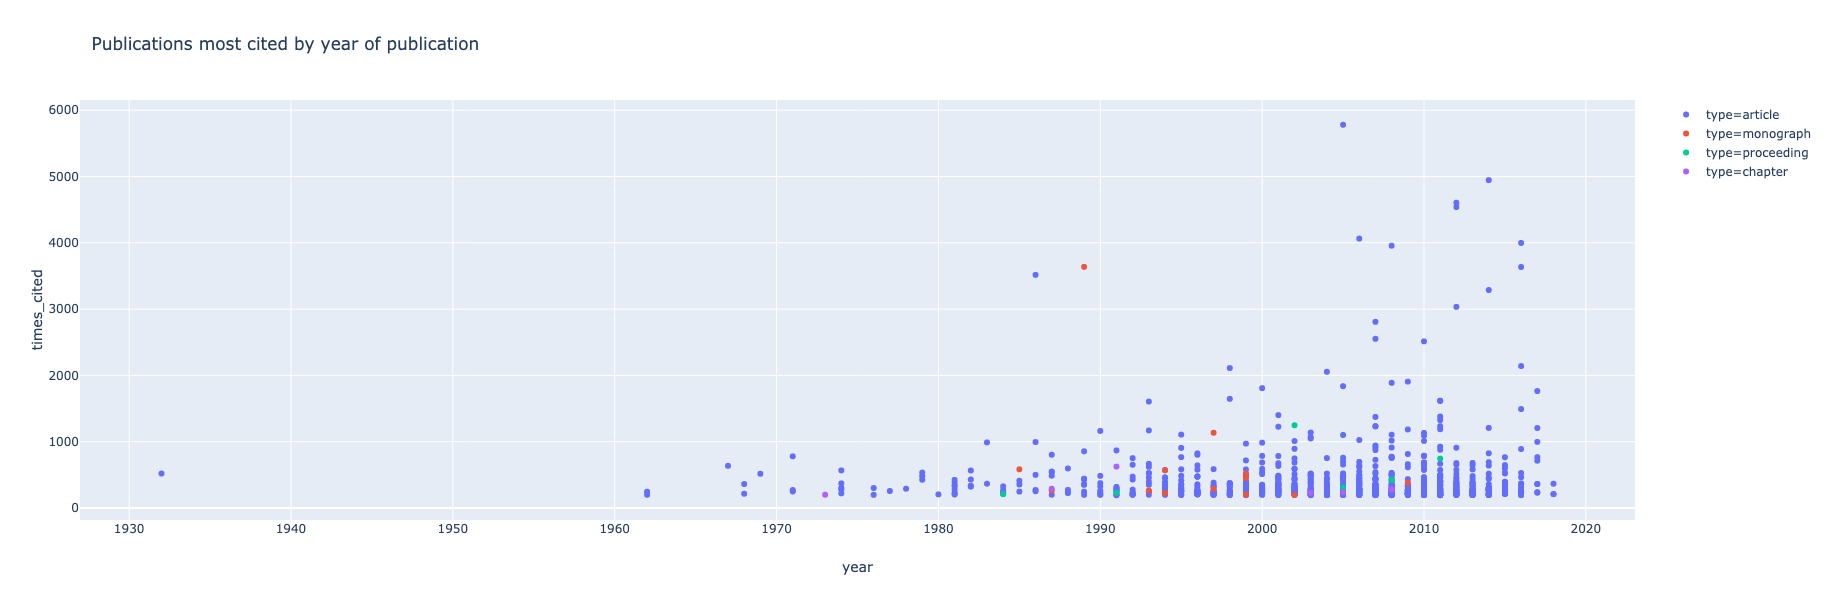

In [5]:
px.scatter(df, x="year", y="times_cited", color="type", hover_name="title", 
           hover_data=['type', 'doi', 'year', 'times_cited', 'journal.title'], 
           height=600, title="Publications most cited by year of publication")

## Publications most cited by journal title

In [6]:
df_subset = df.query("times_cited>100")

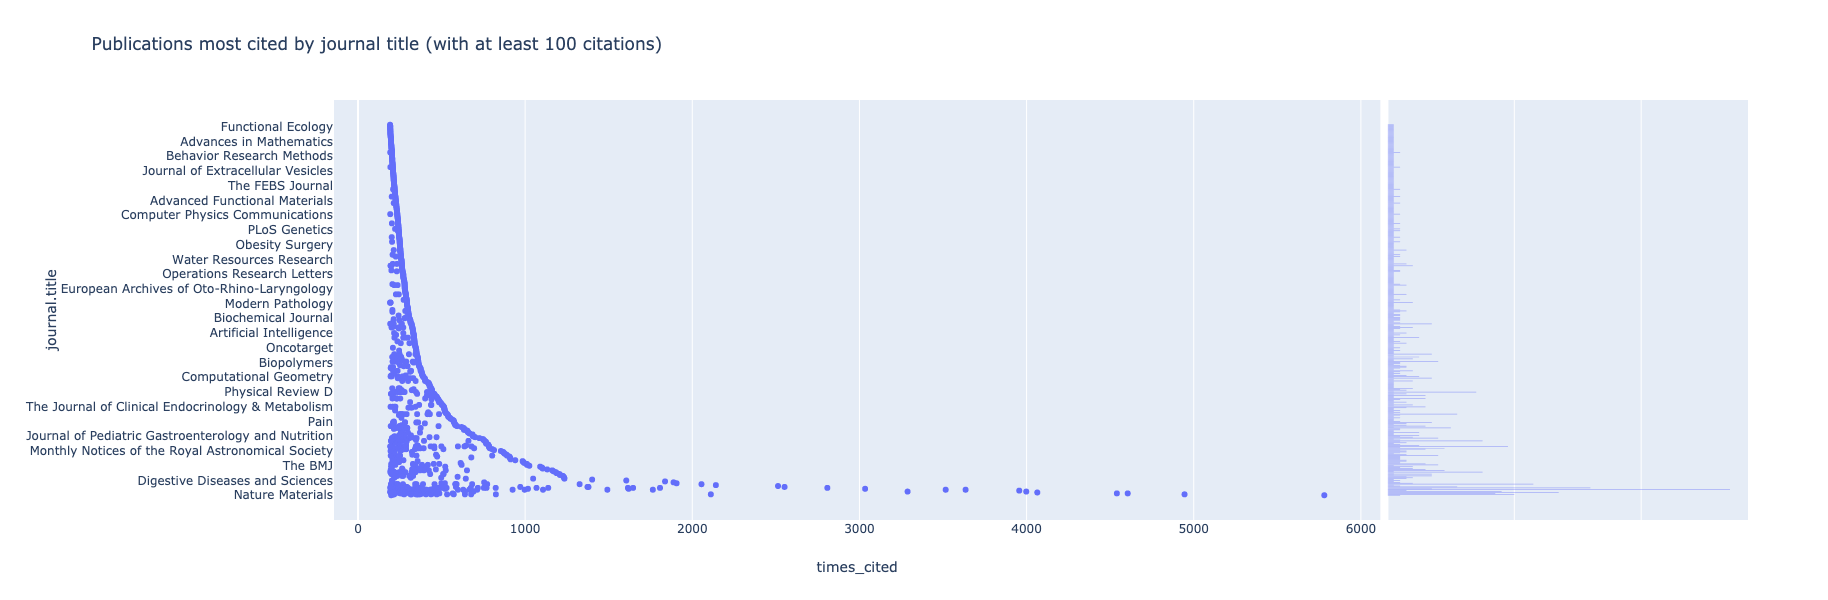

In [7]:
px.scatter(df_subset, y="journal.title", x="times_cited", hover_name="title", marginal_y="histogram",
           hover_data=['type', 'doi', 'year', 'times_cited', 'journal.title'], 
           height=600, title="Publications most cited by journal title (with at least 100 citations)")

## Publications most cited by subject area

Dimensions data include several categorizations, but for this we will use the [Field of Research (FOR)](https://www.arc.gov.au/grants/grant-application/classification-codes-rfcd-seo-and-anzsic-codes) system covering all areas of research from the Australian and New Zealand Standard Research Classification (ANZSRC). 

In [8]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+FOR+times_cited+journal+type] sort by times_cited limit 1000""")

Returned Publications: 1000 (total = 120654)


The FOR structure for a single publication is like this: 

```{'FOR' : 
    [{'id': '3292', 'name': '1402 Applied Economics'}, 
     {'id': '3177', 'name': '1117 Public Health and Health Services'}]} ..etc..
```
Some of the results may not have an associated FOR code (eg because the abstract is not available) so first we want to ensure all JSON data have a valid Field of Research (FOR) code key.Also, we want to break them up cause each publication can have more than one code.


In [9]:
for x in data.publications:
    if not 'FOR' in x:
        x['FOR'] = ""
    else:
        x['FOR'] = [{'name' : x['name'][5:]} for x in x['FOR']] # also remove the digit prefix to improve legibility

Now let's create a new dataframe with the FOR data and preview it.

In [10]:
df = json_normalize(data.publications, record_path='FOR', meta=['doi', 'title', 'times_cited', ['journal', 'title']], errors='ignore' )
df.head()

name                            doi  \
0   Physical Chemistry (incl. Structural)               10.1038/nmat1368   
1  Macromolecular and Materials Chemistry               10.1038/nmat1368   
2                   Materials Engineering               10.1038/nmat1368   
3                     Inorganic Chemistry               10.1038/nmat1368   
4       Public Health and Health Services  10.1016/s0140-6736(14)60460-8   

                                               title  times_cited  \
0  Nanostructured materials for advanced energy c...         5781   
1  Nanostructured materials for advanced energy c...         5781   
2  Nanostructured materials for advanced energy c...         5781   
3  Nanostructured materials for advanced energy c...         5781   
4  Global, regional, and national prevalence of o...         4945   

      journal.title  
0  Nature Materials  
1  Nature Materials  
2  Nature Materials  
3  Nature Materials  
4        The Lancet

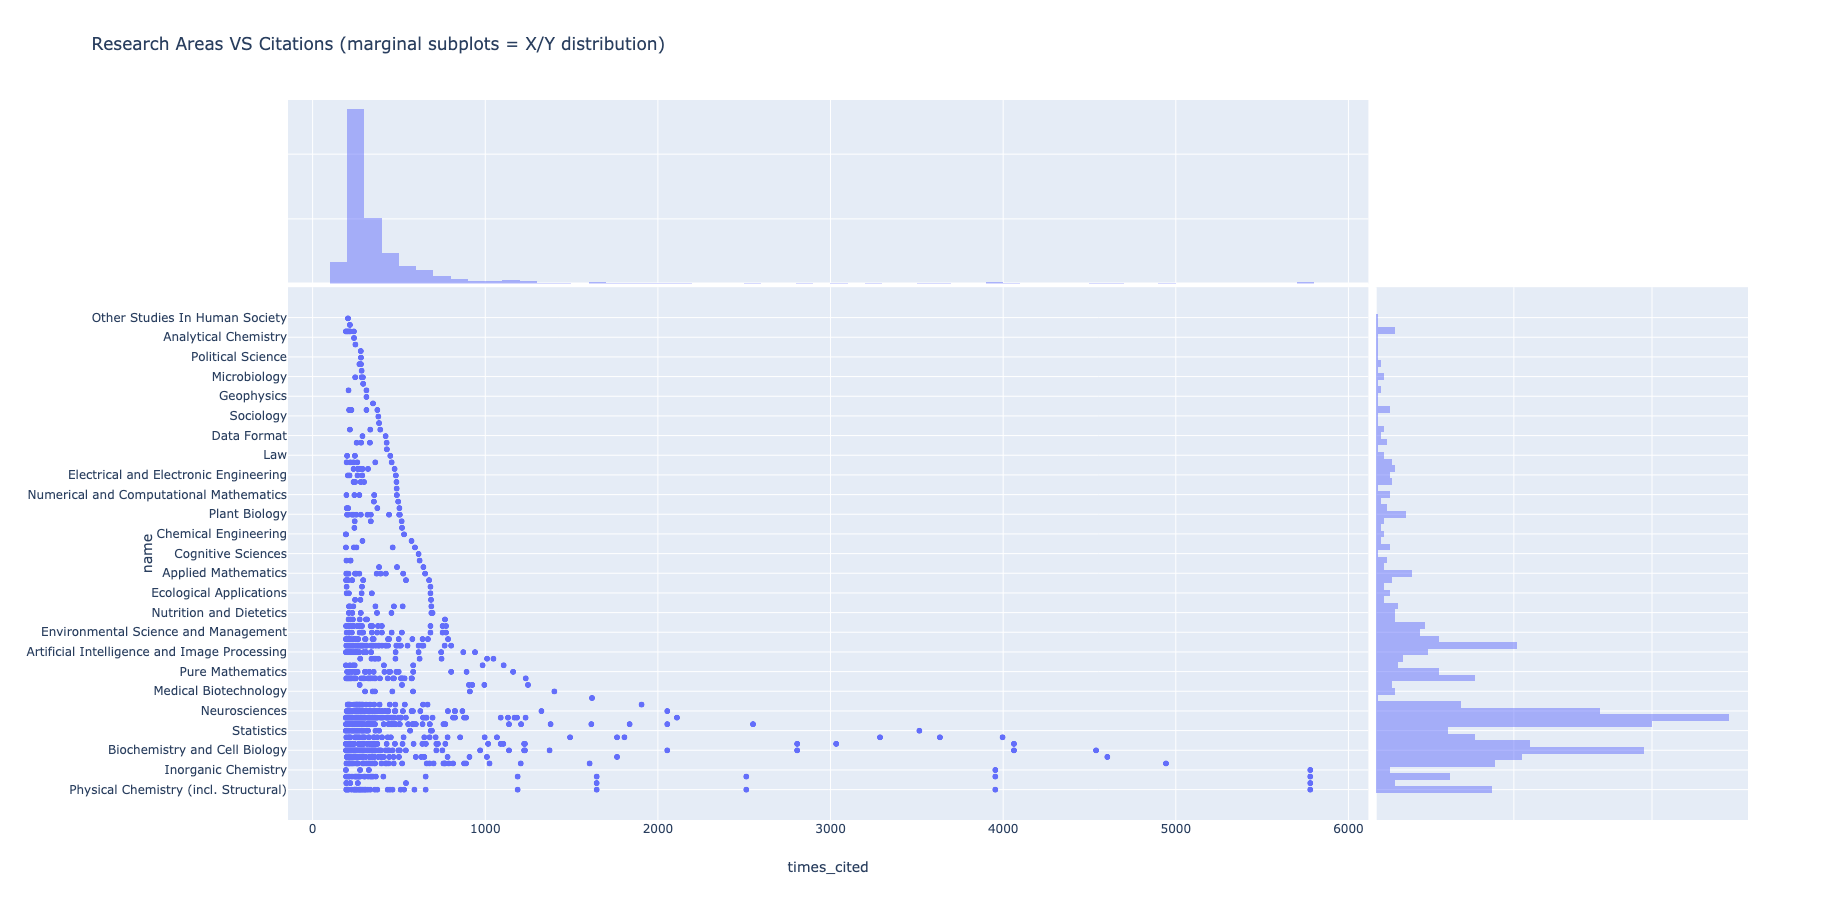

In [11]:
px.scatter(df, x="times_cited", y="name", hover_name="name", hover_data=['times_cited'],
           marginal_x="histogram", marginal_y="histogram", 
           height=900, title="Research Areas VS Citations (marginal subplots = X/Y distribution)")

## Combining the previous two charts ...

Focusing on the top 100 publications to keep the chart readable...

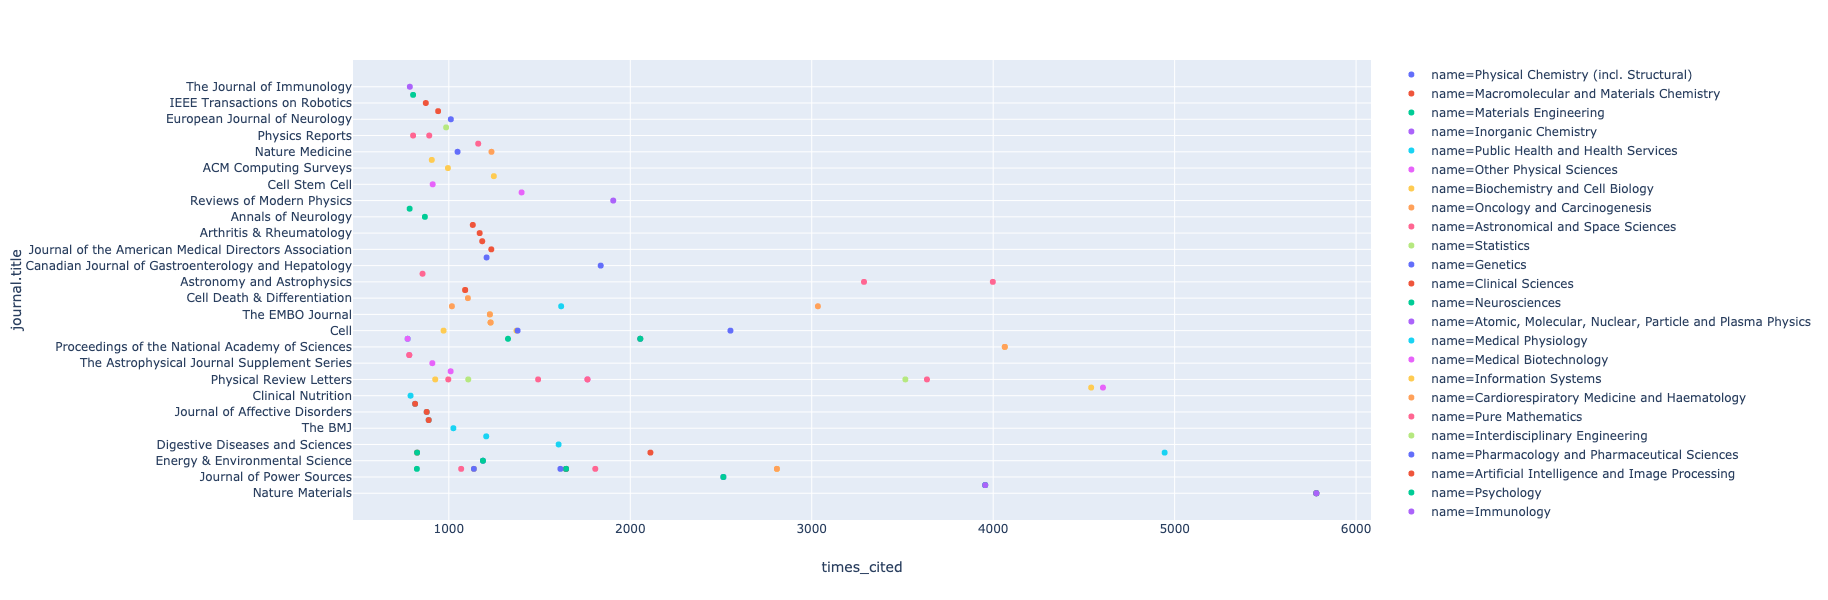

In [12]:
px.scatter(df.head(100), x="times_cited", y="journal.title", color="name")

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 